In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
from data.dataset import DataSet
from data.transform import BaseTransform
from data.sampler import TripletSampler, InferenceSampler
from models.baseline import Baseline
import matplotlib.pyplot as plt
from torchvision.transforms import Compose
from data.transform import RandomRotate, RandomBrightness, RandomBlur
from utils.common import ts2np
import torch
import matplotlib.pyplot as plt


In [2]:
csv_path ='datasets/GTSRB_cropped/Train.csv'
root_dir ='datasets/GTSRB_cropped'
dataset = DataSet(
    csv_path=csv_path,
    root_dir=root_dir,
)
sampler = TripletSampler(
    dataset=dataset,
    batch_shuffle=True,
    batch_size=(2, 2)
)
import torch.utils.data as tordata
loader = tordata.DataLoader(
    dataset=dataset,
    batch_sampler=sampler,
    num_workers=1
)

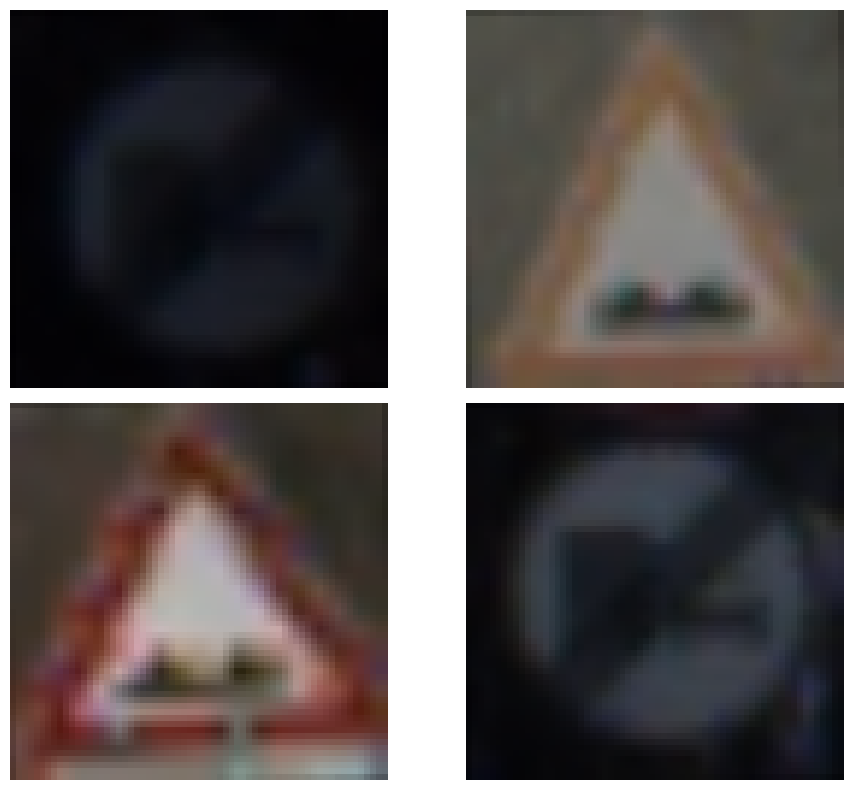

In [9]:
transform = Compose([
    RandomRotate(1.0, 10),
    RandomBlur(1.0, 5),
    RandomBrightness(1.0, (-0.2, 0.2))
])


batch = next(iter(loader))[0]
def show_batch(batch, nrows=2, ncols=2):
    plt.figure(figsize=(10, 8))
    
    # 转换为NHWC格式并取前nrows*ncols张
    batch = transform(ts2np(batch))  
    batch = torch.Tensor(batch)
    images = batch[:nrows*ncols].permute(0, 2, 3, 1).cpu().numpy()
    images = images.astype(np.uint8)
    
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 执行可视化
show_batch(batch, nrows=2, ncols=2)